In [1]:
import pandas as pd
# importing yfinance which calls the yahoo finance api -- we can use this for daily stock prices 
import yfinance as yf

In [2]:
# Querying all data from the S&P 500
sp500 = yf.Ticker("^GSPC")
sp500 = sp500.history(period="max")
sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-12-18 00:00:00-05:00,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,0.0,0.0
2023-12-19 00:00:00-05:00,4743.720215,4768.689941,4743.720215,4768.370117,4026970000,0.0,0.0
2023-12-20 00:00:00-05:00,4764.729980,4778.009766,4697.819824,4698.350098,4201320000,0.0,0.0


In [3]:
sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2023-12-11 00:00:00-05:00', '2023-12-12 00:00:00-05:00',
               '2023-12-13 00:00:00-05:00', '2023-12-14 00:00:00-05:00',
               '2023-12-15 00:00:00-05:00', '2023-12-18 00:00:00-05:00',
               '2023-12-19 00:00:00-05:00', '2023-12-20 00:00:00-05:00',
               '2023-12-21 00:00:00-05:00', '2023-12-22 00:00:00-05:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24111, freq=None)

<Axes: xlabel='Date'>

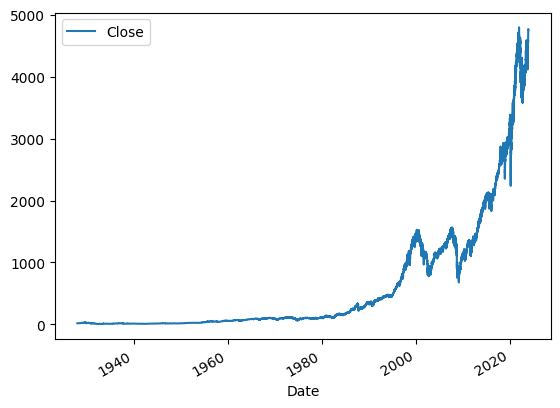

In [4]:
# Let's plot the closing price vs the date-time index
sp500.plot.line(y="Close", use_index = True)

In [5]:
# We don't need to dividends or stock split coloumns, let's remove them
del sp500["Dividends"]
del sp500["Stock Splits"]

In [6]:
# Let's prepare our target variable, which is whether or not the stock will increase in value
# First, we shift the columns by 1 to include tommorow's closing values
sp500["Tomorrow"] = sp500["Close"].shift(-1)

# Now, the "target" is True whenever tomorrow's price is greater than today's
sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2023-12-18 00:00:00-05:00,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,4768.370117,1
2023-12-19 00:00:00-05:00,4743.720215,4768.689941,4743.720215,4768.370117,4026970000,4698.350098,0
2023-12-20 00:00:00-05:00,4764.729980,4778.009766,4697.819824,4698.350098,4201320000,4746.750000,1


In [7]:
# We want the most accurate data, so let's remove any data that predates 1990
sp500 = sp500.loc["1990-01-01":].copy() # the pandas 'loc' method allows us to isolate dates 1990 and beyond


In [8]:
# With the data prepared, we can train the model
# We'll be using sk-learn's Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

# The model will be trained with all the data except the last 100 rows
# The test set will subsequently be the last 100 rows
train = sp500.iloc[:-100]
test = sp500.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
# Note: we don't want to use ALL the columns for risk of overfitting
# One of the unique challenges of time-bound datasets: if we're not careful we'll predict the past using the future 
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [9]:
# Let's test the accuracy of our model
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])

# Changing predictions from a numpy list to a pandas series, just for visibility's sake
preds = pd.Series(preds, index=test.index)

preds

Date
2023-08-03 00:00:00-04:00    0
2023-08-04 00:00:00-04:00    1
2023-08-07 00:00:00-04:00    1
2023-08-08 00:00:00-04:00    1
2023-08-09 00:00:00-04:00    1
                            ..
2023-12-18 00:00:00-05:00    0
2023-12-19 00:00:00-05:00    0
2023-12-20 00:00:00-05:00    0
2023-12-21 00:00:00-05:00    0
2023-12-22 00:00:00-05:00    0
Length: 100, dtype: int32

In [10]:
precision_score(test["Target"], preds)

0.5441176470588235

In [32]:
# Decent accuracy for a foundational model, let's improve that

<Axes: xlabel='Date'>

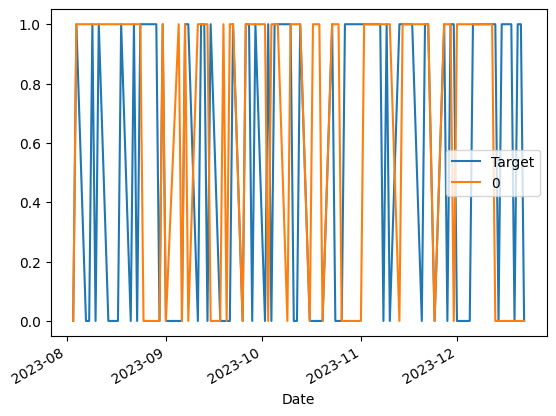

In [12]:
# Let's plot our predictions and the true results
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [13]:
# We need functions that will allow us to backtest our model


def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    # This will loop through the data. With about 250 trades per year, it will functionally loop year to year
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    return pd.concat(all_predictions) # Let's concatenate the predictions into a single dataframe using pandas

In [14]:
# With that done we can backtest our S&P predictions from earlier
predictions = backtest(sp500, model, predictors)

In [15]:
predictions["Predictions"].value_counts()

Predictions
0    3465
1    2596
Name: count, dtype: int64

In [18]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5288906009244992

In [19]:
# Let's look at closing prices on a rolling basis for a holistic view
# Past 2 days, 5 days, 60 days, 250 days, and 100 days
horizons = [2, 5, 60, 250, 100]

new_predictors = []
 
for horizon in horizons:
    rolling_averages = sp500.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [24]:
sp500.dropna()

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_100,Trend_100
Date,,,,,,,,,,,,,,,,,
1990-12-27 00:00:00-05:00,330.850006,331.040009,328.230011,328.290009,102900000,328.720001,1,0.996116,1.0,0.994270,2.0,1.038297,31.0,0.981221,132.0,1.031883,52.0
1990-12-28 00:00:00-05:00,328.290009,328.720001,327.239990,328.720001,111030000,330.220001,1,1.000654,1.0,0.996417,3.0,1.038708,32.0,0.982859,133.0,1.033433,52.0
1990-12-31 00:00:00-05:00,328.709991,330.230011,327.500000,330.220001,114130000,326.450012,0,1.002276,2.0,1.001893,3.0,1.042486,32.0,0.987644,134.0,1.038415,52.0
1991-01-02 00:00:00-05:00,330.200012,330.750000,326.450012,326.450012,126280000,321.910004,0,0.994259,1.0,0.992533,3.0,1.029774,32.0,0.976670,134.0,1.026995,51.0
1991-01-03 00:00:00-05:00,326.459991,326.529999,321.899994,321.910004,141450000,321.000000,0,0.992998,0.0,0.984079,2.0,1.015003,31.0,0.963454,133.0,1.013146,51.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-15 00:00:00-05:00,4714.229980,4725.529785,4704.689941,4719.189941,8218980000,4740.560059,1,0.999962,1.0,1.007858,4.0,1.071470,36.0,1.110293,134.0,1.065567,53.0
2023-12-18 00:00:00-05:00,4725.580078,4749.520020,4725.580078,4740.560059,4060340000,4768.370117,1,1.002259,1.0,1.007340,4.0,1.074613,37.0,1.114353,135.0,1.069901,54.0
2023-12-19 00:00:00-05:00,4743.720215,4768.689941,4743.720215,4768.370117,4026970000,4698.350098,0,1.002925,2.0,1.007909,4.0,1.079160,37.0,1.119893,135.0,1.075726,54.0


In [25]:
# Let's improve the model further by increasing number of estimators and reducing sample split 
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [26]:
# Instead of just a 0 or 1, the predict_proba method will return a probability of the target being reached
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >= .6] = 1
    preds[preds <= .6] = 0 # These new thresholds for what becomes a 0 or 1 means the model must be more confident
    preds = pd.Series(preds, index=test.index, name = "Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [28]:
predictions = backtest(sp500.dropna(), model, new_predictors)

In [31]:
predictions["Predictions"].value_counts()

Predictions
0.0    4919
1.0     891
Name: count, dtype: int64

In [33]:
precision_score(predictions["Target"], predictions["Predictions"])


0.5578002244668911

In [34]:
# Less predictions made, but the ones that WERE made are most accurate

In [35]:
predictions

,Target,Predictions
Date,,
2000-11-16 00:00:00-05:00,0,0.0
2000-11-17 00:00:00-05:00,0,0.0
2000-11-20 00:00:00-05:00,1,0.0
2000-11-21 00:00:00-05:00,0,0.0
2000-11-22 00:00:00-05:00,1,0.0
...,...,...
2023-12-15 00:00:00-05:00,1,0.0
2023-12-18 00:00:00-05:00,1,0.0
2023-12-19 00:00:00-05:00,0,0.0
